# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:

In [141]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [142]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [144]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

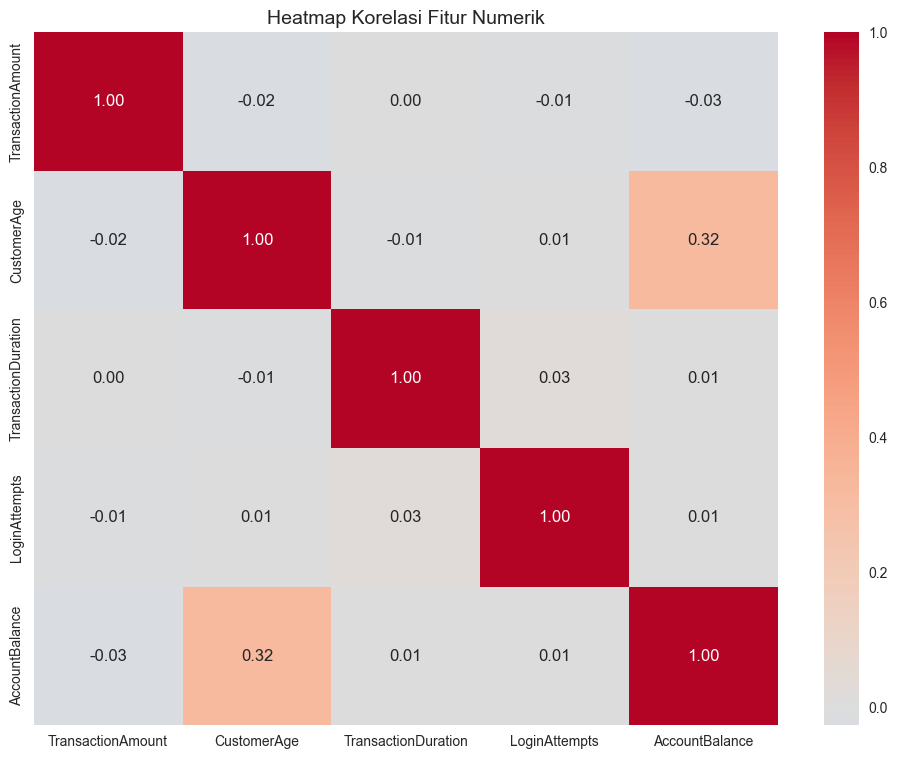

In [145]:
# Menampilkan korelasi antar fitur 
plt.figure(figsize=(12, 9))
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik', fontsize=14)
plt.show()

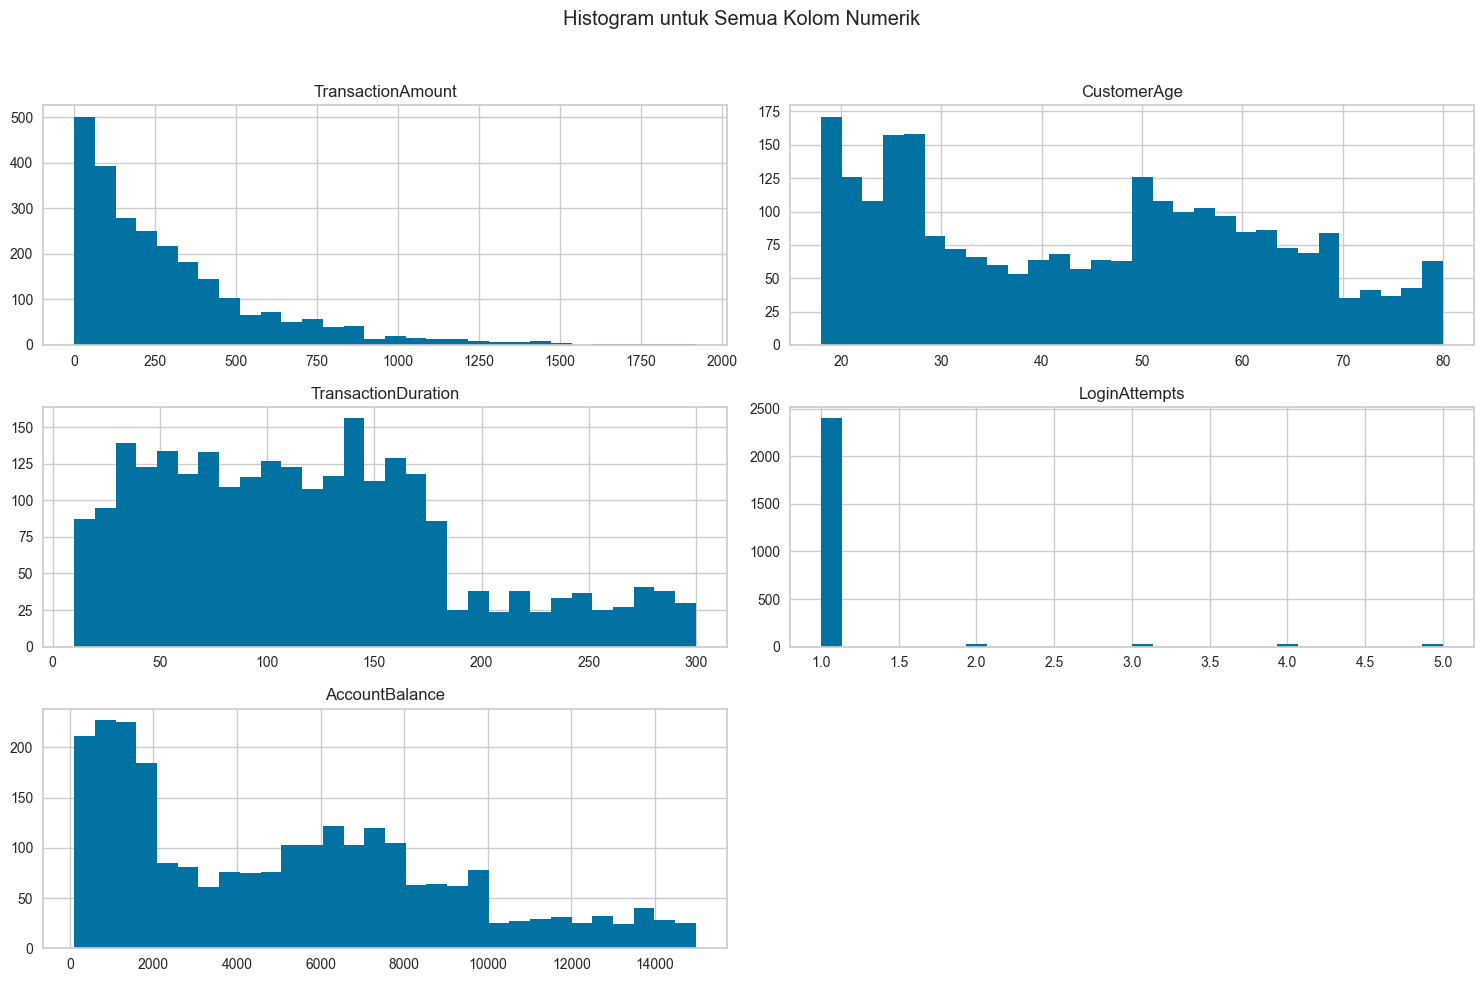

In [146]:
# Menampilkan histogram untuk semua kolom numerik 
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histogram untuk Semua Kolom Numerik')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

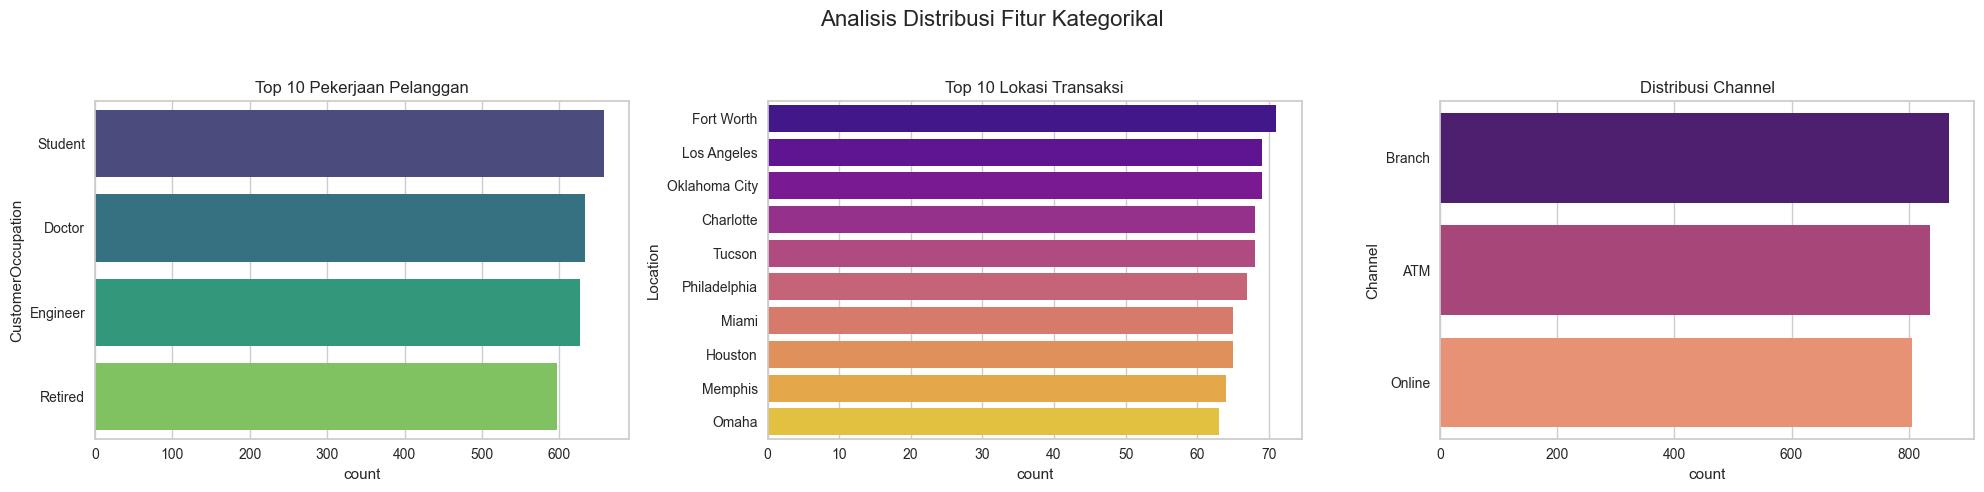

In [147]:
# Visualisasi yang lebih informatif
plt.figure(figsize=(20, 5))
plt.suptitle('Analisis Distribusi Fitur Kategorikal', fontsize=16)

plt.subplot(1, 3, 1)
sns.countplot(data=df, y='CustomerOccupation', order=df['CustomerOccupation'].value_counts().nlargest(10).index, palette='viridis')
plt.title('Top 10 Pekerjaan Pelanggan')

plt.subplot(1, 3, 2)
sns.countplot(data=df, y='Location', order=df['Location'].value_counts().nlargest(10).index, palette='plasma')
plt.title('Top 10 Lokasi Transaksi')

plt.subplot(1, 3, 3)
sns.countplot(data=df, y='Channel', order=df['Channel'].value_counts().index, palette='magma')
plt.title('Distribusi Channel')


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [148]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [149]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [150]:
# Menangani data yang hilang 

# Mendefinisikan kolom awal untuk imputasi
numerical_features_ori = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
categorical_features_ori = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Imputasi untuk fitur numerik
imputer = SimpleImputer(strategy='median')
df[numerical_features_ori] = imputer.fit_transform(df[numerical_features_ori])

# Imputasi untuk fitur kategorikal
for col in categorical_features_ori:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Pengecekan ulang missing values setelah imputasi awal:")
print(df.isnull().sum())

Pengecekan ulang missing values setelah imputasi awal:
TransactionID              29
AccountID                  21
TransactionAmount           0
TransactionDate            28
TransactionType             0
Location                    0
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                     0
CustomerAge                 0
CustomerOccupation          0
TransactionDuration         0
LoginAttempts               0
AccountBalance              0
PreviousTransactionDate    24
dtype: int64


In [151]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True) 
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris setelah menghapus duplikat: 2515


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [152]:
# Handling Outlier untuk 'TransactionAmount' dengan Capping
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
df['TransactionAmount'] = df['TransactionAmount'].clip(upper=upper_bound)
print("Outlier pada 'TransactionAmount' telah di-cap.\n")

Outlier pada 'TransactionAmount' telah di-cap.



In [153]:
# Feature Engineering dari kolom Tanggal
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['DayOfWeek'] = df['TransactionDate'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)
df['TransactionToBalanceRatio'] = df['TransactionAmount'] / (df['AccountBalance'] + 0.001)
df.replace([np.inf, -np.inf], np.nan, inplace=True) 
print("Fitur baru telah dibuat dari tanggal dan rasio.\n")

Fitur baru telah dibuat dari tanggal dan rasio.



In [154]:
# Binning untuk 'CustomerAge'
age_bins = [0, 35, 55, 100]
age_labels = ['Muda (0-35)', 'Dewasa (36-55)', 'Lansia (56+)']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)
print("Fitur 'AgeGroup' telah dibuat dari 'CustomerAge'\n")

Fitur 'AgeGroup' telah dibuat dari 'CustomerAge'



In [155]:
# Imputasi final untuk kolom baru yang mungkin menghasilkan NaN
df['TransactionHour'].fillna(df['TransactionHour'].median(), inplace=True)
df['DayOfWeek'].fillna(df['DayOfWeek'].median(), inplace=True)
df['TransactionToBalanceRatio'].fillna(df['TransactionToBalanceRatio'].median(), inplace=True)
df['AgeGroup'].fillna(df['AgeGroup'].mode()[0], inplace=True)

print("Pembersihan dan Pra-pemrosesan Tingkat Lanjut Selesai.")

Pembersihan dan Pra-pemrosesan Tingkat Lanjut Selesai.


In [156]:
# Kolom-kolom yang tidak lagi dibutuhkan
columns_to_drop = [
    'TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID',
    'TransactionDate', 'PreviousTransactionDate', 'CustomerAge' 
]

# Melakukan drop pada dataframe utama untuk persiapan scaling/encoding
df = df.drop(columns=columns_to_drop)
print("Kolom yang tidak relevan telah di-drop.")

Kolom yang tidak relevan telah di-drop.


In [157]:
# Mendefinisikan ulang daftar fitur final untuk transformasi
numerical_features = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance',
                      'TransactionHour', 'DayOfWeek', 'IsWeekend', 'TransactionToBalanceRatio']
categorical_features = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'AgeGroup']

# Scaling fitur numerik pada dataframe utama
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,DayOfWeek,IsWeekend,TransactionToBalanceRatio,AgeGroup
0,-1.080281,Debit,San Diego,ATM,Doctor,-0.552784,-0.204672,-0.000326,-0.848404,-0.297763,0.0,-0.383288,Lansia (56+)
1,0.371339,Debit,Houston,ATM,Doctor,0.309031,-0.204672,2.230061,-0.848404,-0.297763,0.0,-0.332897,Lansia (56+)
2,-0.630545,Debit,Mesa,Online,Student,-0.911874,-0.204672,-1.029497,1.888910,-0.962247,0.0,-0.158338,Muda (0-35)
3,-0.397220,Debit,Raleigh,Online,Student,-1.357146,-0.204672,0.891357,-0.848404,1.695690,0.0,-0.344812,Muda (0-35)
4,-1.082846,Credit,Atlanta,Online,Student,1.127756,-0.204672,0.597386,0.520253,-0.962247,0.0,-0.385226,Dewasa (36-55)


In [158]:
# Encoding fitur kategorikal pada dataframe utama
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,DayOfWeek,IsWeekend,TransactionToBalanceRatio,AgeGroup
0,-1.080281,1,36,0,0,-0.552784,-0.204672,-0.000326,-0.848404,-0.297763,0.0,-0.383288,1
1,0.371339,1,15,0,0,0.309031,-0.204672,2.230061,-0.848404,-0.297763,0.0,-0.332897,1
2,-0.630545,1,23,2,3,-0.911874,-0.204672,-1.029497,1.888910,-0.962247,0.0,-0.158338,2
3,-0.397220,1,33,2,3,-1.357146,-0.204672,0.891357,-0.848404,1.695690,0.0,-0.344812,2
4,-1.082846,0,1,2,3,1.127756,-0.204672,0.597386,0.520253,-0.962247,0.0,-0.385226,0


In [159]:
df.columns.tolist()

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionHour',
 'DayOfWeek',
 'IsWeekend',
 'TransactionToBalanceRatio',
 'AgeGroup']

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [160]:
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,DayOfWeek,IsWeekend,TransactionToBalanceRatio,AgeGroup
count,2.515000e+03,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2.515000e+03,2.515000e+03,2.515000e+03,2.515000e+03,2515.0,2.515000e+03,2515.000000
mean,-1.398484e-16,0.776143,20.928827,0.989264,1.521272,2.260176e-17,1.469114e-16,-1.190124e-16,3.997686e-16,-1.158340e-16,0.0,5.367917e-17,1.082704
std,1.000199e+00,0.416910,12.195117,0.804401,1.134477,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,0.0,1.000199e+00,0.820093
min,-1.135716e+00,0.000000,0.000000,0.000000,0.000000,-1.572599e+00,-2.046718e-01,-1.292886e+00,-8.484042e-01,-9.622475e-01,0.0,-3.888448e-01,0.000000
25%,-8.032643e-01,1.000000,11.000000,0.000000,0.500000,-8.113289e-01,-2.046718e-01,-9.270882e-01,-8.484042e-01,-9.622475e-01,0.0,-3.517496e-01,0.000000
50%,-2.895555e-01,1.000000,21.000000,1.000000,2.000000,-1.075128e-01,-2.046718e-01,-9.785551e-02,-8.484042e-01,-2.977630e-01,0.0,-2.831841e-01,1.000000
75%,5.050577e-01,1.000000,31.000000,2.000000,3.000000,5.963034e-01,-2.046718e-01,6.520728e-01,5.202530e-01,1.031206e+00,0.0,-9.297765e-02,2.000000
max,2.467541e+00,1.000000,42.000000,2.000000,3.000000,2.592843e+00,6.524080e+00,2.544519e+00,1.888910e+00,1.695690e+00,0.0,1.579253e+01,2.000000


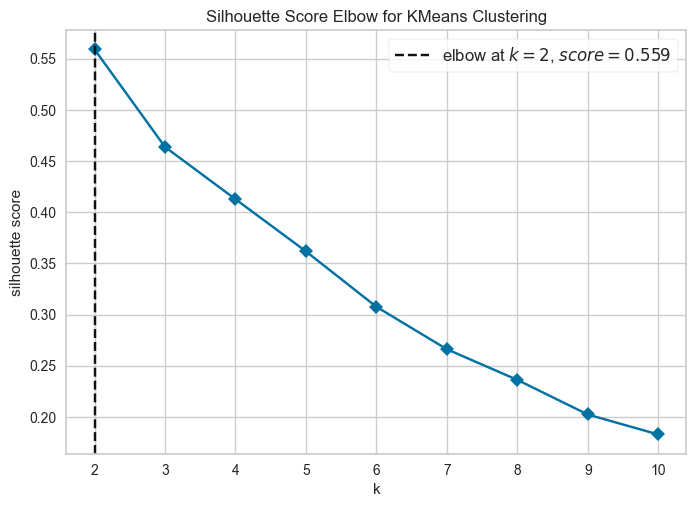

Jumlah cluster optimal yang disarankan adalah: 2


In [161]:
# Menggunakan KElbowVisualizer untuk menemukan k optimal
model = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(model, k=(2,11), timings=False, metric='silhouette')

visualizer.fit(df)
visualizer.show()

# Menentukan k optimal berdasarkan hasil visualizer
optimal_k = visualizer.elbow_value_
print(f"Jumlah cluster optimal yang disarankan adalah: {optimal_k}")

In [162]:
# Melatih model final dengan k optimal
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = model_kmeans.fit_predict(df)

# Menambahkan hasil cluster langsung ke df yang sudah diproses
df['Cluster'] = cluster_labels

Jalankan cell code ini untuk menyimpan model kamu.

In [163]:
# Menyimpan model menggunakan joblib
joblib.dump(model_kmeans, "model_clustering.h5")
print("Model clustering telah disimpan sebagai 'model_clustering.h5'")

Model clustering telah disimpan sebagai 'model_clustering.h5'


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [164]:
# Menghitung dan menampilkan nilai Silhouette Score.
score = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f"Silhouette Score untuk k={optimal_k} adalah: {score:.3f}")

Silhouette Score untuk k=2 adalah: 0.559


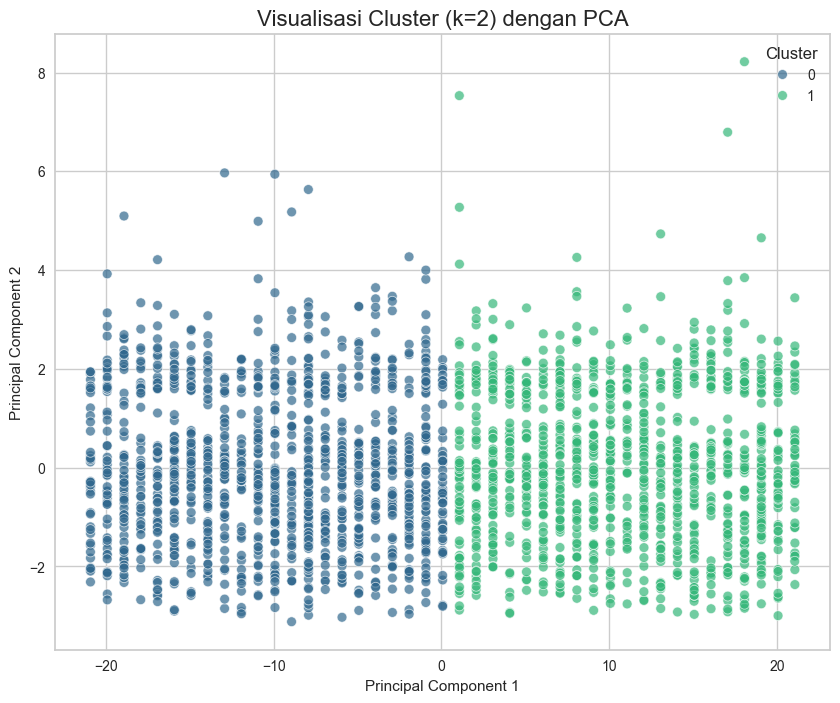

In [165]:
# Membuat visualisasi hasil clustering
pca_viz = PCA(n_components=2)
df_pca_viz = pca_viz.fit_transform(df.drop('Cluster', axis=1))

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_pca_viz[:, 0], y=df_pca_viz[:, 1], hue=df['Cluster'],
                palette='viridis', s=50, alpha=0.7)
plt.title(f'Visualisasi Cluster (k={optimal_k}) dengan PCA', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [166]:
# Membangun model menggunakan PCA.
pca_model = PCA(n_components=0.95)
df_pca_model = pca_model.fit_transform(df.drop('Cluster', axis=1))
print(f"Jumlah komponen PCA yang digunakan untuk model alternatif: {pca_model.n_components_}")

# Melatih K-Means pada data PCA
model_kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
model_kmeans_pca.fit(df_pca_model)
print("Model K-Means alternatif pada data PCA berhasil dilatih.")

Jumlah komponen PCA yang digunakan untuk model alternatif: 2
Model K-Means alternatif pada data PCA berhasil dilatih.


In [167]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")
print("Model clustering berbasis PCA telah disimpan sebagai 'PCA_model_clustering.h5'")

Model clustering berbasis PCA telah disimpan sebagai 'PCA_model_clustering.h5'


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [168]:
# Menampilkan statistik untuk fitur numerik per cluster
analysis_scaled = df.groupby('Cluster')[numerical_features].mean()
display(analysis_scaled)

,TransactionAmount,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,DayOfWeek,IsWeekend,TransactionToBalanceRatio
Cluster,,,,,,,,
0,-0.006462,0.016083,0.014350,0.008750,0.020451,0.011442,0.0,0.010147
1,0.006892,-0.017153,-0.015305,-0.009332,-0.021812,-0.012204,0.0,-0.010822


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 0: (Pelajar Pengguna Cabang - Fort Worth)**:
  - **Rata-rata (mean) TransactionAmount:** -0.006 (281.99)
  - **Rata-rata (mean) AccountBalance:** 0.009 (5045.32)
  - **Rata-rata (mean) TransactionDuration:** 0.016 (120.60)
  - **Analisis:** Cluster ini secara spesifik mengelompokkan nasabah dengan profil Pelajar Muda yang dominan melakukan transaksi Debit melalui Kantor Cabang (Branch). Pembeda utama dan terkuat dari segmen ini adalah lokasi transaksi mereka yang terpusat di Fort Worth. Secara finansial, perilaku mereka sangat mendekati rata-rata, seperti yang ditunjukkan oleh nilai scaled mean yang mendekati nol.

2. **Cluster 0: (Pelajar Pengguna Cabang - Oklahoma City)**:
  - **Rata-rata (mean) TransactionAmount:** 0.007 (285.32)
  - **Rata-rata (mean) AccountBalance:** -0.009 (4987.11) 
  - **Rata-rata (mean) TransactionDuration:** -0.017 (118.29)
  - **Analisis:** Cluster ini memiliki profil demografi dan perilaku yang nyaris identik dengan Cluster 0 (Pelajar Muda, Debit, Transaksi di Cabang). Satu-satunya faktor pembeda yang signifikan adalah lokasi geografis mereka, yaitu di Oklahoma City. Ini menunjukkan bahwa model K-Means menemukan lokasi sebagai variabel paling efektif untuk memisahkan populasi yang homogen ini.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [169]:
# Mengubah nama kolom 'Cluster' menjadi 'Target' di dataframe utama
df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [170]:
df.to_csv('data_clustering.csv', index=False)
print("File 'data_clustering.csv' (data terproses untuk mesin) telah disimpan.")

File 'data_clustering.csv' (data terproses untuk mesin) telah disimpan.


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [171]:
df_inversed = df.copy()
df_inversed[numerical_features] = scaler.inverse_transform(df_inversed[numerical_features])
for col in categorical_features:
    df_inversed[col] = label_encoders[col].inverse_transform(df_inversed[col])

display(df_inversed.head())

,TransactionAmount,TransactionType,Location,Channel,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionHour,DayOfWeek,IsWeekend,TransactionToBalanceRatio,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,Doctor,81.0,1.0,5112.21,16.0,1.0,0.0,0.002756,Lansia (56+),1
1,376.24,Debit,Houston,ATM,Doctor,141.0,1.0,13758.91,16.0,1.0,0.0,0.027345,Lansia (56+),0
2,126.29,Debit,Mesa,Online,Student,56.0,1.0,1122.35,18.0,0.0,0.0,0.112523,Muda (0-35),1
3,184.50,Debit,Raleigh,Online,Student,25.0,1.0,8569.06,16.0,4.0,0.0,0.021531,Muda (0-35),1
4,13.45,Credit,Atlanta,Online,Student,198.0,1.0,7429.40,17.0,0.0,0.0,0.001810,Dewasa (36-55),0


In [172]:
# Menampilkan analisis deskriptif untuk fitur kategorikal (modus) per cluster
# Analisis numerik pada data yang sudah kembali ke nilai asli
analysis_inversed_numeric = df_inversed.groupby('Target')[numerical_features].agg(['mean', 'median', 'min', 'max'])
display(analysis_inversed_numeric)

print("Analisis Fitur Kategorikal per Cluster (Nilai Asli):")
for feature in categorical_features:
    mode_analysis = df_inversed.groupby('Target')[feature].agg(lambda x: x.mode()[0])
    print(f"\nFitur: {feature}")
    print(mode_analysis)


TransactionAmount                       TransactionDuration         \
                    mean   median   min    max                mean median   
Target                                                                      
0             281.986048  212.025  0.32  899.2          120.604777  112.0   
1             285.317806  207.470  0.26  899.2          118.290879  112.0   

                    LoginAttempts         ... DayOfWeek      IsWeekend         \
         min    max          mean median  ...       min  max      mean median   
Target                                    ...                                   
0       10.0  300.0      1.130200    1.0  ...       0.0  4.0       0.0    0.0   
1       10.0  300.0      1.112572    1.0  ...       0.0  4.0       0.0    0.0   

                 TransactionToBalanceRatio                                
        min  max                      mean    median       min       max  
Target                                                                    
0       0.0  0.0                  0.194737  0.049890  0.000045  5.112942  
1       0.0  0.0                  0.184505  0.053287  0.000142  7.895911  

[2 rows x 32 columns]

Analisis Fitur Kategorikal per Cluster (Nilai Asli):

Fitur: TransactionType
Target
0    Debit
1    Debit
Name: TransactionType, dtype: object

Fitur: Location
Target
0       Fort Worth
1    Oklahoma City
Name: Location, dtype: object

Fitur: Channel
Target
0    Branch
1    Branch
Name: Channel, dtype: object

Fitur: CustomerOccupation
Target
0    Student
1    Student
Name: CustomerOccupation, dtype: object

Fitur: AgeGroup
Target
0    Muda (0-35)
1    Muda (0-35)
Name: AgeGroup, dtype: object


## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 0: (Pelajar Pengguna Cabang - Fort Worth)**:
  - **Rata-rata (mean) TransactionAmount:** 281.99
  - **Rata-rata (mean) AccountBalance:** 5045.32
  - **Modus Lokasi:** Fort Worth
  - **Analisis:** Cluster ini secara spesifik mewakili segmen nasabah pelajar di Fort Worth. Perilaku finansial mereka (jumlah transaksi dan saldo) sangat standar dan mendekati rata-rata populasi. Aktivitas utama mereka adalah transaksi debit di kantor cabang. Bagi cabang di Fort Worth, segmen ini adalah basis nasabah utama mereka untuk transaksi harian.

2. **Cluster 0: (Pelajar Pengguna Cabang - Oklahoma City)**:
  - **Rata-rata (mean) TransactionAmount:** 285.32
  - **Rata-rata (mean) AccountBalance:** 4987.11 
  - **Modus Lokasi:** Oklahoma City
  - **Analisis:** Segmen ini adalah "kembaran" dari Cluster 0, dengan profil yang nyaris identik dari segi demografi (pelajar) dan perilaku (transaksi debit di cabang). Pembeda utamanya yang paling jelas adalah lokasi geografis mereka yang terpusat di Oklahoma City. Hal ini menunjukkan bahwa untuk populasi yang homogen ini, K-Means menemukan lokasi sebagai cara paling efektif untuk melakukan segmentasi.


(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [173]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
print("Data yang di-inverse sudah terintegrasi dengan kolom 'Target' (hasil cluster).")

Data yang di-inverse sudah terintegrasi dengan kolom 'Target' (hasil cluster).


In [174]:
# Simpan Data
df_inversed.to_csv('data_clustering_inverse.csv', index=False)
print("File 'data_clustering_inverse.csv' (data nilai asli) telah disimpan.")

File 'data_clustering_inverse.csv' (data nilai asli) telah disimpan.
